<a href="https://colab.research.google.com/github/mounicasatraboina/-MOUNICA_INFO5731_Fall2021/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here

from bs4 import BeautifulSoup as bs
import pandas as pd
import requests as rq
# *************************************
def imdb_webscraper(link):
    df = pd.DataFrame(columns=['User name', 'Star', 'Review title', 'Review text', 'Review posted time'])
    req = rq.get(link).text
    soup = bs(req,'html.parser')

    user_names = soup.find_all('span', attrs={'class' : 'display-name-link'})
    star = soup.find_all('span', attrs={'class' : 'rating-other-user-rating'})
    review_title = soup.find_all('a', attrs={'class' : 'title'})
    review_text = soup.find_all('div', attrs={'class' : 'text show-more__control'})
    review_posted_time = soup.find_all('span', attrs={'class' : 'review-date'})

    list = []
    for i in range(len(user_names)):
        list.append(user_names[i].get_text())
    df['User name'] = list

    """list = []
    for i in range(len(star)):
        list.append(star[i].get_text()[6])
    df['Star'] = list"""

    list = []
    for i in range(len(review_title)):
        list.append(review_title[i].get_text())
    df['Review title'] = list
    list = []
    for i in range(len(review_text)):
        list.append(review_text[i].get_text())
    df['Review text'] = list

    list = []
    for i in range(len(review_posted_time)):
        list.append(review_posted_time[i].get_text())
    df['Review posted time'] = list
    print(df.head())
    df.to_csv("output.csv")

imdb_webscraper('https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3')


        User name  ... Review posted time
0       boblipton  ...  11 September 2021
1  nogodnomasters  ...  11 September 2021
2         kosmasp  ...  12 September 2021
3  Sleepin_Dragon  ...   9 September 2021
4   jboothmillard  ...  19 September 2021

[5 rows x 5 columns]


In [ ]:
!pip install --upgrade gensim

In [ ]:
import spacy.cli
spacy.cli.download("en")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
import nltk
nltk.download('stopwords')

import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
!pip install pyLDAvis

In [ ]:
import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [ ]:
# import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# # Plotting tools
# import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
# import matplotlib.pyplot as plt
# %matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
df = pd.read_csv('output.csv', encoding = "ISO-8859-1")
df.head()

# Convert to list
data = df['Review text'].tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

#Tokenization
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

# Creating Bigram and Trigram Models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])



#Remove Stopwords, Make Bigrams and Lemmatize

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

#Create the Dictionary and Corpus needed for Topic Modeling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

['It was an okay movie. Simu Liu is the son of the seemingly immortal master '
 'of the Ten Rings --always good to see Tony Leung, and I hope he soaked '
 'Disney --who winds up opposing his dad, and Awkwafina is his slacker sort-of '
 'girlfriend. They are fine in the leads, as is Menger Zhang as his sister, '
 'and Michelle Yeoh as their aunt -- always good to see her, and I hope she '
 'soaked Disney too.I have grown increasingly fond of martial arts films over '
 'the last couple of decades, and the decline of the movie musical is the '
 'reason why. They dont make movies like that any more, and when they try, '
 'theyre often embarrassing. People dont like the unreality of people bursting '
 'out into song, or expressing their emotions through dance. No, they prefer '
 'the solid commonplace of people floating through space to kick each other in '
 'the head. To me, the fight choreography is its own dance, and the fight '
 'between Leung and Fala Chen when they meet and before the

[[('always', 2),
  ('amount', 1),
  ('aplenty', 1),
  ('astaire', 1),
  ('aunt', 1),
  ('be', 2),
  ('burst', 1),
  ('certain', 1),
  ('challenge', 1),
  ('chinese', 1),
  ('choreography', 1),
  ('commonplace', 1),
  ('connect', 1),
  ('couple', 1),
  ('dance', 3),
  ('decade', 1),
  ('decline', 1),
  ('embarrassing', 1),
  ('emotion', 1),
  ('expectation', 1),
  ('exposition', 1),
  ('express', 1),
  ('fight', 2),
  ('film', 2),
  ('fine', 1),
  ('float', 1),
  ('fond', 1),
  ('girlfriend', 1),
  ('good', 3),
  ('graceful', 1),
  ('grow', 1),
  ('head', 1),
  ('high', 1),
  ('hope', 2),
  ('immense', 1),
  ('immortal', 1),
  ('increasingly', 1),
  ('iron', 1),
  ('kick', 1),
  ('last', 1),
  ('lead', 1),
  ('like', 1),
  ('love', 1),
  ('make', 1),
  ('man', 1),
  ('master', 1),
  ('minute', 1),
  ('movie', 2),
  ('musical', 1),
  ('often', 1),
  ('oppose', 1),
  ('particularly', 1),
  ('people', 3),
  ('power', 1),
  ('prefer', 1),
  ('present', 1),
  ('problem', 1),
  ('reason', 1),

In [ ]:
# Building the Topic Model

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=11, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
#View the topics in LDA model

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Compute Model Perplexity and Coherence Score

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#Visualize the topics-keywords

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

vis

[(0,
  '0.023*"movie" + 0.013*"scene" + 0.012*"would" + 0.012*"have" + 0.010*"love" '
  '+ 0.010*"film" + 0.010*"good" + 0.010*"year" + 0.009*"character" + '
  '0.008*"say"'),
 (1,
  '0.014*"character" + 0.010*"bus" + 0.010*"almost" + 0.010*"fight" + '
  '0.010*"cinematic" + 0.010*"sequence" + 0.010*"family" + '
  '0.010*"entertaining" + 0.010*"serious" + 0.010*"topple"'),
 (2,
  '0.012*"time" + 0.009*"lot" + 0.009*"see" + 0.009*"even" + 0.009*"feel" + '
  '0.009*"people" + 0.009*"belong" + 0.009*"stop" + 0.009*"almost" + '
  '0.006*"good"'),
 (3,
  '0.001*"movie" + 0.001*"take" + 0.001*"find" + 0.001*"ashe" + 0.001*"new" + '
  '0.001*"venerable" + 0.001*"formula" + 0.001*"skill" + 0.001*"time" + '
  '0.001*"may"'),
 (4,
  '0.001*"movie" + 0.001*"character" + 0.001*"fight" + 0.001*"would" + '
  '0.001*"good" + 0.001*"much" + 0.001*"marvel" + 0.001*"almost" + '
  '0.001*"scene" + 0.001*"year"'),
 (5,
  '0.016*"great" + 0.015*"film" + 0.011*"character" + 0.010*"go" + '
  '0.009*"good" + 

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.060320 -0.031065       1        1  33.704958
5     -0.134249  0.074087       2        1  24.819433
6      0.139003  0.136488       3        1  13.633088
9      0.065845 -0.039705       4        1   9.883713
2      0.046775 -0.102452       5        1   7.460024
10    -0.045531  0.048767       6        1   4.137890
1     -0.056594 -0.016141       7        1   3.282486
8     -0.024290 -0.050709       8        1   3.012759
4     -0.016797 -0.006159       9        1   0.022533
7     -0.017146 -0.006744      10        1   0.022530
3     -0.017338 -0.006366      11        1   0.020586, topic_info=       Term       Freq      Total Category  logprob  loglift
47    movie  55.000000  55.000000  Default  30.0000  30.0000
42     love  14.000000  14.000000  Default  29.0000  29.0000
114    year  15.000000  15.000000  Default  28.0000  28.0000
23     film  30.000000  30.000000  Default  27.0000  27.0000
28     good  28.000000  28.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
96   marvel   0.000534  18.831519  Topic11  -7.0848  -1.9819
62      see   0.000530  15.850254  Topic11  -7.0923  -1.8170
120    also   0.000530  17.867885  Topic11  -7.0935  -1.9379
184  really   0.000529   9.194876  Topic11  -7.0954  -1.2756
28     good   0.000527  28.452787  Topic11  -7.0978  -2.4075

[755 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
930       1  0.594578   absolutely
930       6  0.297289   absolutely
243       2  0.893023       accord
1023      3  0.771174  accordingly
218       1  0.152923          act
...     ...       ...          ...
114       1  0.635994         year
114       2  0.190798         year
114       5  0.063599         year
114       6  0.127199         year
114       7  0.063599         year

[796 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 7, 10, 3, 11, 2, 9, 5, 8, 4])

In [ ]:
# Building the Topic Model with number of topics as 

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=24, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
#View the topics in LDA model

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Compute Model Perplexity and Coherence Score

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#Visualize the topics-keywords

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

vis

[(3,
  '0.001*"movie" + 0.001*"new" + 0.001*"character" + 0.001*"actually" + '
  '0.001*"make" + 0.001*"marvel" + 0.001*"superhero" + 0.001*"film" + '
  '0.001*"look" + 0.001*"base"'),
 (17,
  '0.001*"also" + 0.001*"make" + 0.001*"especially" + 0.001*"big" + '
  '0.001*"quite" + 0.001*"scene" + 0.001*"people" + 0.001*"time" + '
  '0.001*"good" + 0.001*"really"'),
 (13,
  '0.001*"movie" + 0.001*"come" + 0.001*"marvel" + 0.001*"would" + '
  '0.001*"year" + 0.001*"film" + 0.001*"power" + 0.001*"have" + 0.001*"saun" + '
  '0.001*"character"'),
 (7,
  '0.001*"would" + 0.001*"character" + 0.001*"year" + 0.001*"have" + '
  '0.001*"love" + 0.001*"movie" + 0.001*"power" + 0.001*"saun" + '
  '0.001*"become" + 0.001*"find"'),
 (21,
  '0.001*"movie" + 0.001*"scene" + 0.001*"good" + 0.001*"see" + '
  '0.001*"character" + 0.001*"watch" + 0.001*"feel" + 0.001*"love" + '
  '0.001*"awesome" + 0.001*"say"'),
 (19,
  '0.001*"action" + 0.001*"character" + 0.001*"story" + 0.001*"marvel" + '
  '0.001*"film"

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.179964 -0.136310       1        1  22.948782
5      0.130508  0.030127       2        1  20.883145
0      0.120459  0.067295       3        1   9.570990
16    -0.161288 -0.225300       4        1   8.171579
18    -0.046960  0.061831       5        1   7.179709
1      0.116237  0.020848       6        1   6.059356
2      0.036155 -0.076938       7        1   3.579708
8     -0.045320 -0.003549       8        1   3.316787
11     0.011230  0.045120       9        1   3.224242
10     0.031357 -0.005584      10        1   3.110669
23    -0.016562 -0.034765      11        1   3.001687
14     0.059507 -0.040221      12        1   2.965366
12    -0.111069  0.085522      13        1   2.223928
15    -0.073264  0.091135      14        1   1.747061
9      0.034050  0.015078      15        1   1.420447
20    -0.049578  0.032766      16        1   0.454800
4     -0.025810  0.007192      17        1   0.019434
19    -0.026897  0.009271      18        1   0.018053
22    -0.027295  0.009722      19        1   0.018038
21    -0.025066  0.008028      20        1   0.017739
7     -0.026012  0.009038      21        1   0.017593
13    -0.027545  0.009946      22        1   0.017170
17    -0.028210  0.009887      23        1   0.017151
3     -0.028591  0.009860      24        1   0.016566, topic_info=           Term       Freq      Total Category  logprob  loglift
47        movie  60.000000  60.000000  Default  30.0000  30.0000
83    character  29.000000  29.000000  Default  29.0000  29.0000
23         film  29.000000  29.000000  Default  28.0000  28.0000
321       great  15.000000  15.000000  Default  27.0000  27.0000
524       would  16.000000  16.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
1064     better   0.000417   2.913354  Topic24  -7.1162  -0.1469
615       stand   0.000417   6.101371  Topic24  -7.1162  -0.8862
515         top   0.000417   4.587257  Topic24  -7.1162  -0.6009
28         good   0.000417  29.634982  Topic24  -7.1162  -2.4666
184      really   0.000417   9.539782  Topic24  -7.1162  -1.3331

[1497 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1044      7  0.877963    abilitie
930      10  0.653140  absolutely
930      12  0.326570  absolutely
218       1  0.392085         act
218       2  0.261390         act
...     ...       ...         ...
114      10  0.059211        year
627       2  0.142102         yet
627       3  0.142102         yet
627       4  0.142102         yet
627       5  0.426305         yet

[1250 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 1, 17, 19, 2, 3, 9, 12, 11, 24, 15, 13, 16, 10, 21, 5, 20, 23, 22, 8, 14, 18, 4])

In [ ]:
# Building the Topic Model with number of topics as 

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
#View the topics in LDA model

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Compute Model Perplexity and Coherence Score

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#Visualize the topics-keywords

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

vis

[(0,
  '0.022*"movie" + 0.011*"would" + 0.011*"scene" + 0.010*"character" + '
  '0.010*"have" + 0.010*"good" + 0.008*"love" + 0.008*"year" + 0.008*"lot" + '
  '0.008*"also"'),
 (1,
  '0.014*"film" + 0.009*"marvel" + 0.007*"cinematic" + 0.007*"yet" + '
  '0.007*"come" + 0.007*"many" + 0.006*"character" + 0.006*"bus" + '
  '0.006*"sequence" + 0.006*"set"'),
 (2,
  '0.011*"dweller" + 0.011*"wenwu" + 0.009*"attack" + 0.009*"go" + '
  '0.008*"great" + 0.008*"good" + 0.007*"escape" + 0.007*"fight" + '
  '0.007*"darkness" + 0.007*"iron"'),
 (3,
  '0.020*"movie" + 0.017*"play" + 0.007*"time" + 0.007*"marvel" + '
  '0.007*"watch" + 0.007*"action" + 0.007*"future" + 0.007*"amazing" + '
  '0.004*"new" + 0.004*"take"'),
 (4,
  '0.012*"dragon" + 0.009*"character" + 0.009*"good" + 0.009*"get" + '
  '0.009*"story" + 0.009*"act" + 0.006*"movie" + 0.006*"fight" + 0.006*"great" '
  '+ 0.006*"marvel"'),
 (5,
  '0.023*"movie" + 0.019*"film" + 0.014*"character" + 0.011*"good" + '
  '0.010*"see" + 0.010*"gr

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.070163 -0.055581       1        1  41.157451
5     -0.070222 -0.020703       2        1  28.270058
1      0.030065  0.128125       3        1  11.403212
2      0.133625 -0.067797       4        1  11.184849
4     -0.016271  0.003677       5        1   4.877338
3     -0.007033  0.012278       6        1   3.107091, topic_info=         Term       Freq      Total Category  logprob  loglift
47      movie  51.000000  51.000000  Default  30.0000  30.0000
100      play   7.000000   7.000000  Default  29.0000  29.0000
96     marvel  16.000000  16.000000  Default  28.0000  28.0000
23       film  29.000000  29.000000  Default  27.0000  27.0000
524     would  16.000000  16.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
1008    brand   0.372192   2.208685   Topic6  -5.5554   1.6907
774      seek   0.372132   1.739119   Topic6  -5.5555   1.9296
762     light   0.372130   2.374812   Topic6  -5.5555   1.6181
820   serious   0.372127   2.202657   Topic6  -5.5555   1.6933
120      also   0.372004  17.778069   Topic6  -5.5559  -0.3953

[384 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
115       1  0.985181    able
218       1  0.493845     act
218       2  0.329230     act
218       5  0.164615     act
244       1  0.309428  action
...     ...       ...     ...
114       3  0.063771    year
114       4  0.127542    year
627       1  0.164890     yet
627       2  0.329780     yet
627       3  0.494669     yet

[471 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 2, 3, 5, 4])

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

#Loading Data
def load_data(path,file_name):
    
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

#preprocessing of Data

def preprocess_data(doc_set):
    
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts
  
#Preparing Corpus

def prepare_corpus(doc_clean):
    
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

#Creating LSA model
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

#
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

number_of_topics=
words=10
document_list,titles=load_data("","output.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)




Total Number of Documents: 52
[(0, '0.368*"shang" + 0.368*"chi" + 0.290*"movi" + 0.280*"ring" + 0.265*"wenwu" + 0.251*"ten" + 0.141*"marvel" + 0.122*"kati" + 0.108*"xial" + 0.106*"fight"'), (1, '0.588*"movi" + -0.242*"wenwu" + -0.174*"chi" + -0.173*"shang" + 0.160*"scene" + 0.140*"mcu" + 0.129*"watch" + 0.120*"charact" + -0.111*"xial" + -0.110*"kati"'), (2, '0.315*"marvel" + 0.232*"film" + -0.220*"wenwu" + 0.191*"chi" + 0.191*"shang" + -0.179*"year" + -0.175*"love" + -0.164*"would" + 0.151*"legend" + -0.136*"fight"'), (3, '0.254*"scene" + -0.202*"year" + -0.184*"ten" + -0.183*"marvel" + -0.169*"ring" + 0.165*"mcu" + -0.151*"legend" + 0.151*"fight" + -0.145*"movi" + 0.135*"film"'), (4, '0.360*"movi" + -0.328*"film" + -0.174*"year" + -0.142*"charact" + -0.116*"yet" + -0.105*"make" + -0.100*"fun" + 0.098*"legend" + 0.097*"ring" + -0.097*"would"'), (5, '0.182*"time" + 0.174*"peopl" + 0.150*"even" + 0.147*"charact" + -0.143*"marvel" + 0.142*"also" + 0.105*"belong" + -0.103*"love" + 0.097*"e

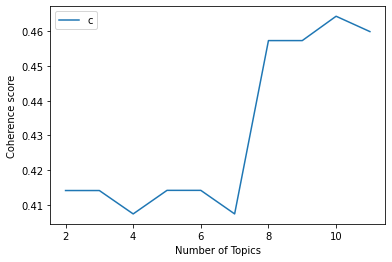

In [ ]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

''' Topic modeling is a type of unsupervised natural language processing that uses Number of topics to represent 
a text document and better explain the underlying information.Topic modeling is used in a variety of applications, such as searching 
for questions on Stack Overflow.There are various approaches to do topic modeling.
Latent Dirichlet Allocation (LDA) is a model used to classify text in a document to a particular topic.
Latent Semantic Analysis (LSA) is one of the method in topic modeling It takes the matrix of documents and divide them into
individual matrix document topic 
LDA, LSA were created with various coherence values and the one with the highest coherence value was chosen.
The best results obtained from the LDA method was 
0.34 of coherence value when the number of topics was 11
0.38 of coherence value when the number of topics was 24
0.36 of coherence value when the number of topics was 6, so the 
optimum number of topic is 24
while in the graph it shows the LSA coherence value decreases and then it increase and the highest coherence value is 0.47 when number of topic 10.
So the highest value in the graph is 10 ,therefore the optimum number of topic is 10.'''

